In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import locale
# import requests
# import os
import csv
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Collecting base data...
temp_df = pd.read_csv("Resources/election_all.csv")
pop_df = pd.read_csv("Resources/population2000-2016ALL.csv")
#v2000 = pd.read_csv("Resources/FOR_JINHO_2000.csv.csv")
#v2004 = pd.read_csv("Resources/FOR_JINHO_2004.csv.csv")
v2008 = pd.read_csv("Resources/FOR_JINHO_2008.csv")
v2012 = pd.read_csv("Resources/FOR_JINHO_2012.csv")
#v2016 = pd.read_csv("Resources/FOR_JINHO_2016.csv.csv")
v2012.head()

,Location,total_votes,2012_democrat_votes,2012_republican_votes
0,"Alabama, Autauga",23932,6363.0,17379.0
1,"Alabama, Baldwin",85338,18424.0,66016.0
2,"Alabama, Barbour",11509,5912.0,5550.0
3,"Alabama, Bibb",8420,2202.0,6132.0
4,"Alabama, Blount",24006,2970.0,20757.0


In [3]:
# Creating master State, County details...
master_location_df = temp_df[['state','county','state_po']]
master_location_df = master_location_df.drop_duplicates()
master_location_df['Location'] = master_location_df.state+", "+master_location_df.county
master_location_df.columns = ['State', 'County', 'State_po', 'Location']
master_location_df = master_location_df.dropna()
master_location_df.to_csv(r'Resources/master_state_info.csv', index=False, header=True)
# print(len(master_location_df))
# master_location_df.head()

In [4]:
# Collecting required fields...
# pop_df = pop_df[['Location','2000','2004','2008','2012','2016']]
pop_df = pop_df[['Location','2012']]
# print(len(pop_df))
# pop_df.head()
pop_final = pd.merge(pop_df, master_location_df, on='Location')
pop_final
# Creating summary data by state...
pop_state_summary = pop_final.groupby('State')
pop_state_summary = pop_state_summary.sum()

pop_county_summary = pop_final.groupby('Location')
pop_county_summary = pop_county_summary.sum()
pop_county_summary = pop_county_summary[pop_county_summary['2012'] != 0]
pop_county_summary.reset_index
pop_county_summary.head()

,2012
Location,
"Alabama, Autauga",54954
"Alabama, Baldwin",190145
"Alabama, Barbour",27169
"Alabama, Bibb",22667
"Alabama, Blount",57580


In [5]:
# Creating summary for State...
v2012_final = pd.merge(v2012, master_location_df, on='Location')
v2012_final['2012_other_votes'] = v2012_final["total_votes"]-v2012_final["2012_democrat_votes"]-v2012_final["2012_republican_votes"]
v2012_state_summary = v2012_final.groupby('State')
v2012_state_summary = v2012_state_summary.sum()
# v2012_state_summary.head()
v2012_state_summary['year'] = '2012'
year = v2012_state_summary['year'].iloc[0]
# print(v2012_state_summary['total_votes'].min()/1000, v2012_state_summary['total_votes'].max()/1000)
#
# merge population data to calcuate avg.
#
v2012_state_summary = v2012_state_summary.merge(pop_state_summary, on='State')
v2012_state_summary['avg_votes'] = round(v2012_state_summary['total_votes']*100/v2012_state_summary['2012'],0)
v2012_state_summary['2012_democrat_votes'] = round(v2012_state_summary['2012_democrat_votes']*100/v2012_state_summary['2012'],0)
v2012_state_summary['2012_republican_votes'] = round(v2012_state_summary['2012_republican_votes']*100/v2012_state_summary['2012'],0)
v2012_state_summary['2012_other_votes'] = round(v2012_state_summary['2012_other_votes']*100/v2012_state_summary['2012'],0)
hv_st = v2012_state_summary['avg_votes'].max()
print(hv_st)
highst = v2012_state_summary.loc[v2012_state_summary['avg_votes'] == hv_st]
hv_st = highst.index.tolist()
lv_st = v2012_state_summary['avg_votes'].min()
print(lv_st)
lowst = v2012_state_summary.loc[v2012_state_summary['avg_votes'] == lv_st]
lv_st = lowst.index.tolist()
v2012_state_summary.head()

55.0
31.0


,total_votes,2012_democrat_votes,2012_republican_votes,2012_other_votes,year,2012,avg_votes
State,,,,,,,
Alabama,2070353,17.0,27.0,0.0,2012,4730827,44.0
Arizona,2299254,16.0,19.0,1.0,2012,6554978,35.0
Arkansas,1069468,13.0,22.0,1.0,2012,2924172,37.0
California,13038547,21.0,13.0,1.0,2012,37948800,34.0
Colorado,2569217,25.0,23.0,1.0,2012,5192647,49.0


In [6]:
# Creating summary for Counties..
v2012_county_summary = v2012_final.groupby('Location', as_index=False)
v2012_county_summary = v2012_county_summary.sum()
# print(v2012_county_summary['total_votes'].min(), v2012_county_summary['total_votes'].max())
v2012_county_summary = v2012_county_summary.merge(pop_county_summary, on='Location')
v2012_county_summary['avg_votes'] = round(v2012_county_summary['total_votes']*100/v2012_county_summary['2012'],0)
v2012_county_summary['2012_democrat_votes'] = round(v2012_county_summary['2012_democrat_votes']*100/v2012_county_summary['2012'],0)
v2012_county_summary['2012_republican_votes'] = round(v2012_county_summary['2012_republican_votes']*100/v2012_county_summary['2012'],0)
v2012_county_summary['2012_other_votes'] = round(v2012_county_summary['2012_other_votes']*100/v2012_county_summary['2012'],0)
hv_cy = v2012_county_summary['avg_votes'].max()
highcy = v2012_county_summary.loc[v2012_county_summary['avg_votes'] == hv_cy]
hv_cy = highcy.Location.tolist()
lv_cy = v2012_county_summary['avg_votes'].min()
lowcy = v2012_county_summary.loc[v2012_county_summary['avg_votes'] == lv_cy]
lv_cy = lowcy.Location.tolist()
v2012_county_summary.head()

,Location,total_votes,2012_democrat_votes,2012_republican_votes,2012_other_votes,2012,avg_votes
0,"Alabama, Autauga",23932,12.0,32.0,0.0,54954,44.0
1,"Alabama, Baldwin",85338,10.0,35.0,0.0,190145,45.0
2,"Alabama, Barbour",11509,22.0,20.0,0.0,27169,42.0
3,"Alabama, Bibb",8420,10.0,27.0,0.0,22667,37.0
4,"Alabama, Blount",24006,5.0,36.0,0.0,57580,42.0


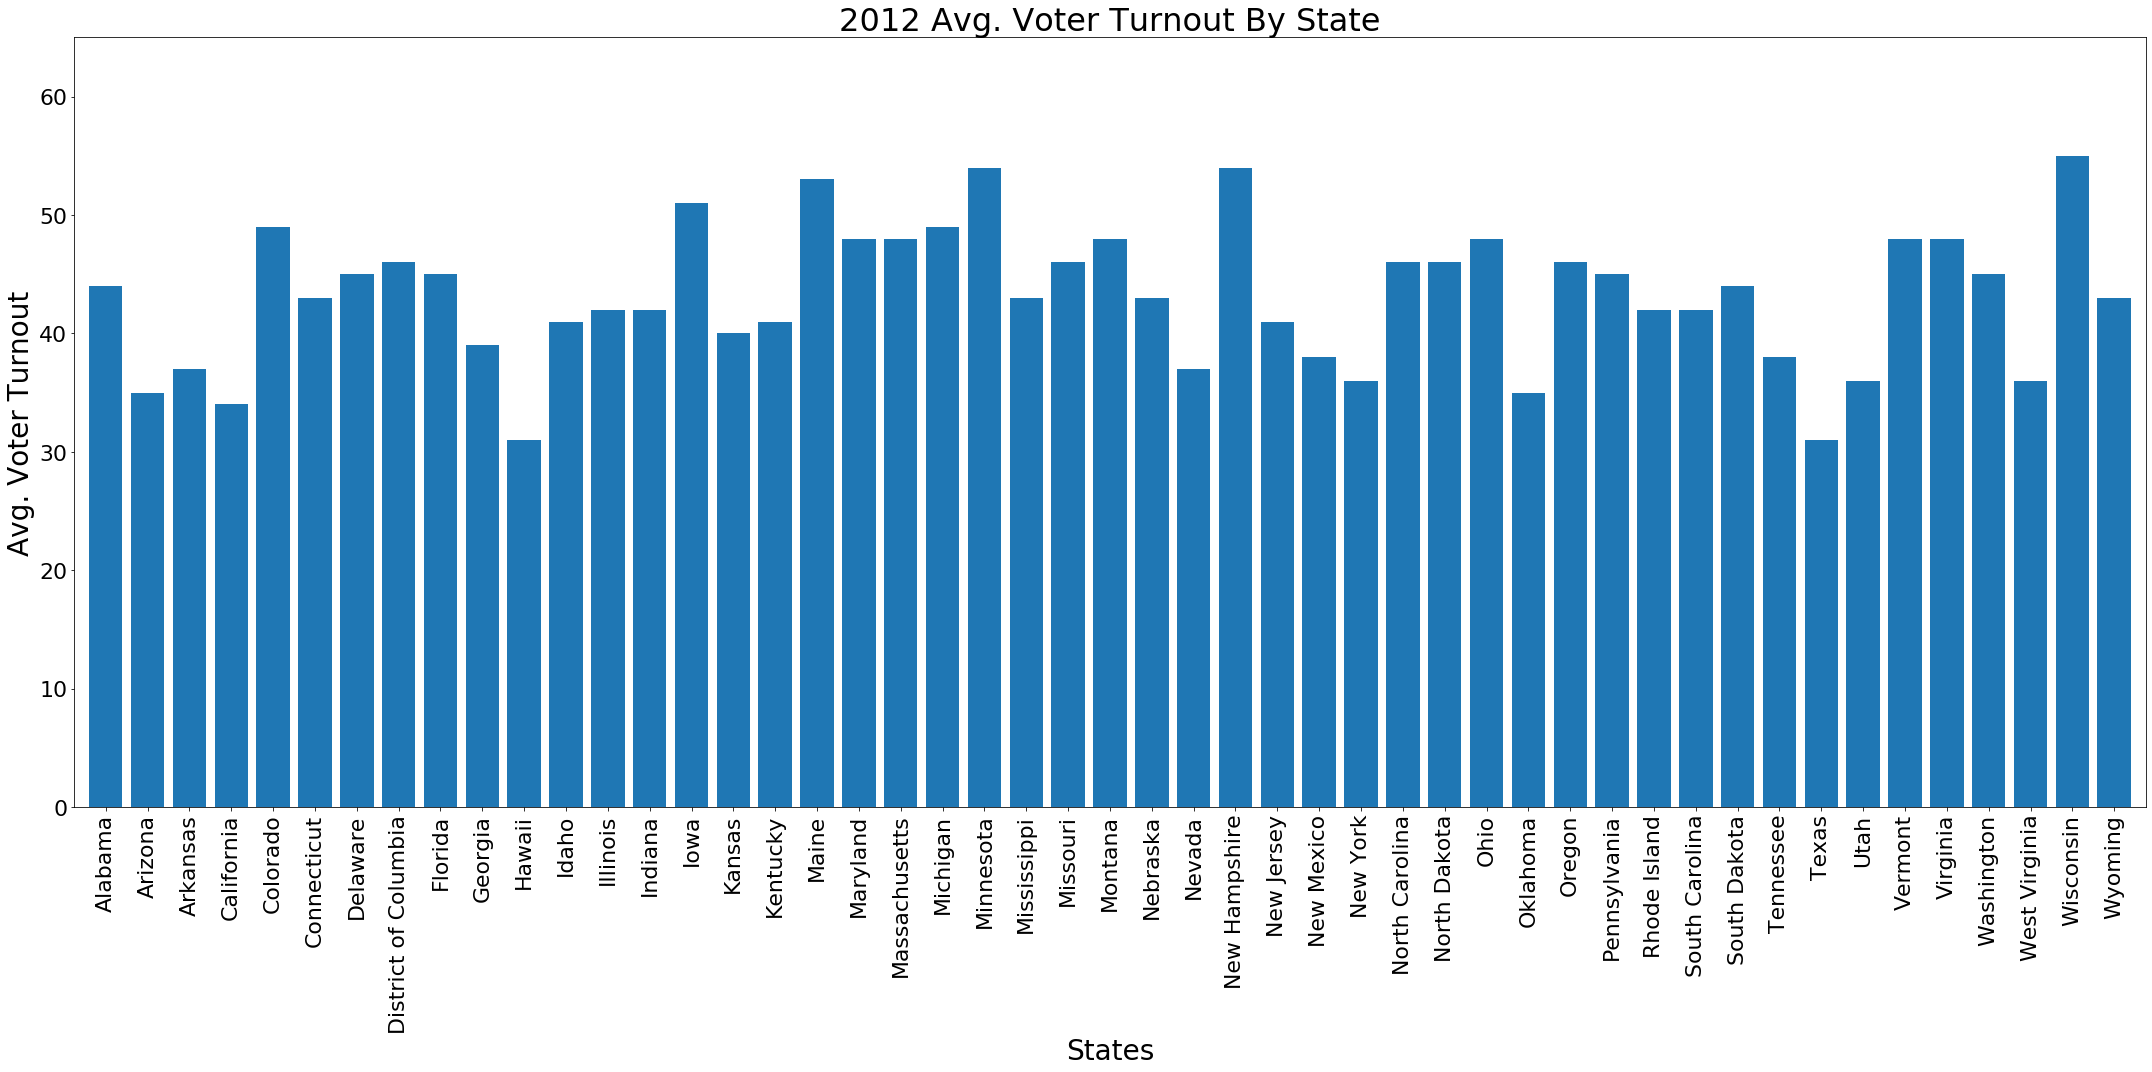

In [7]:
# Voter turnout by state...
#
title = year+' Avg. Voter Turnout By State'
pfile = title.replace(" ",'_')+'.png'
pfile = f"Resources/Images/{pfile}"
plt.figure(figsize=(30,15))
plt.rc('axes', titlesize=32)
plt.rc('axes', labelsize=28)
plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=22)
plt.bar(v2012_state_summary.index, v2012_state_summary.avg_votes)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.xlabel('States')
plt.ylabel("Avg. Voter Turnout")
plt.title(title)
plt.xlim(-0.75, len(v2012_state_summary.index)-.25)
plt.ylim(0, v2012_state_summary.avg_votes.max()+10)
plt.tight_layout()
plt.savefig(pfile)
plt.show()

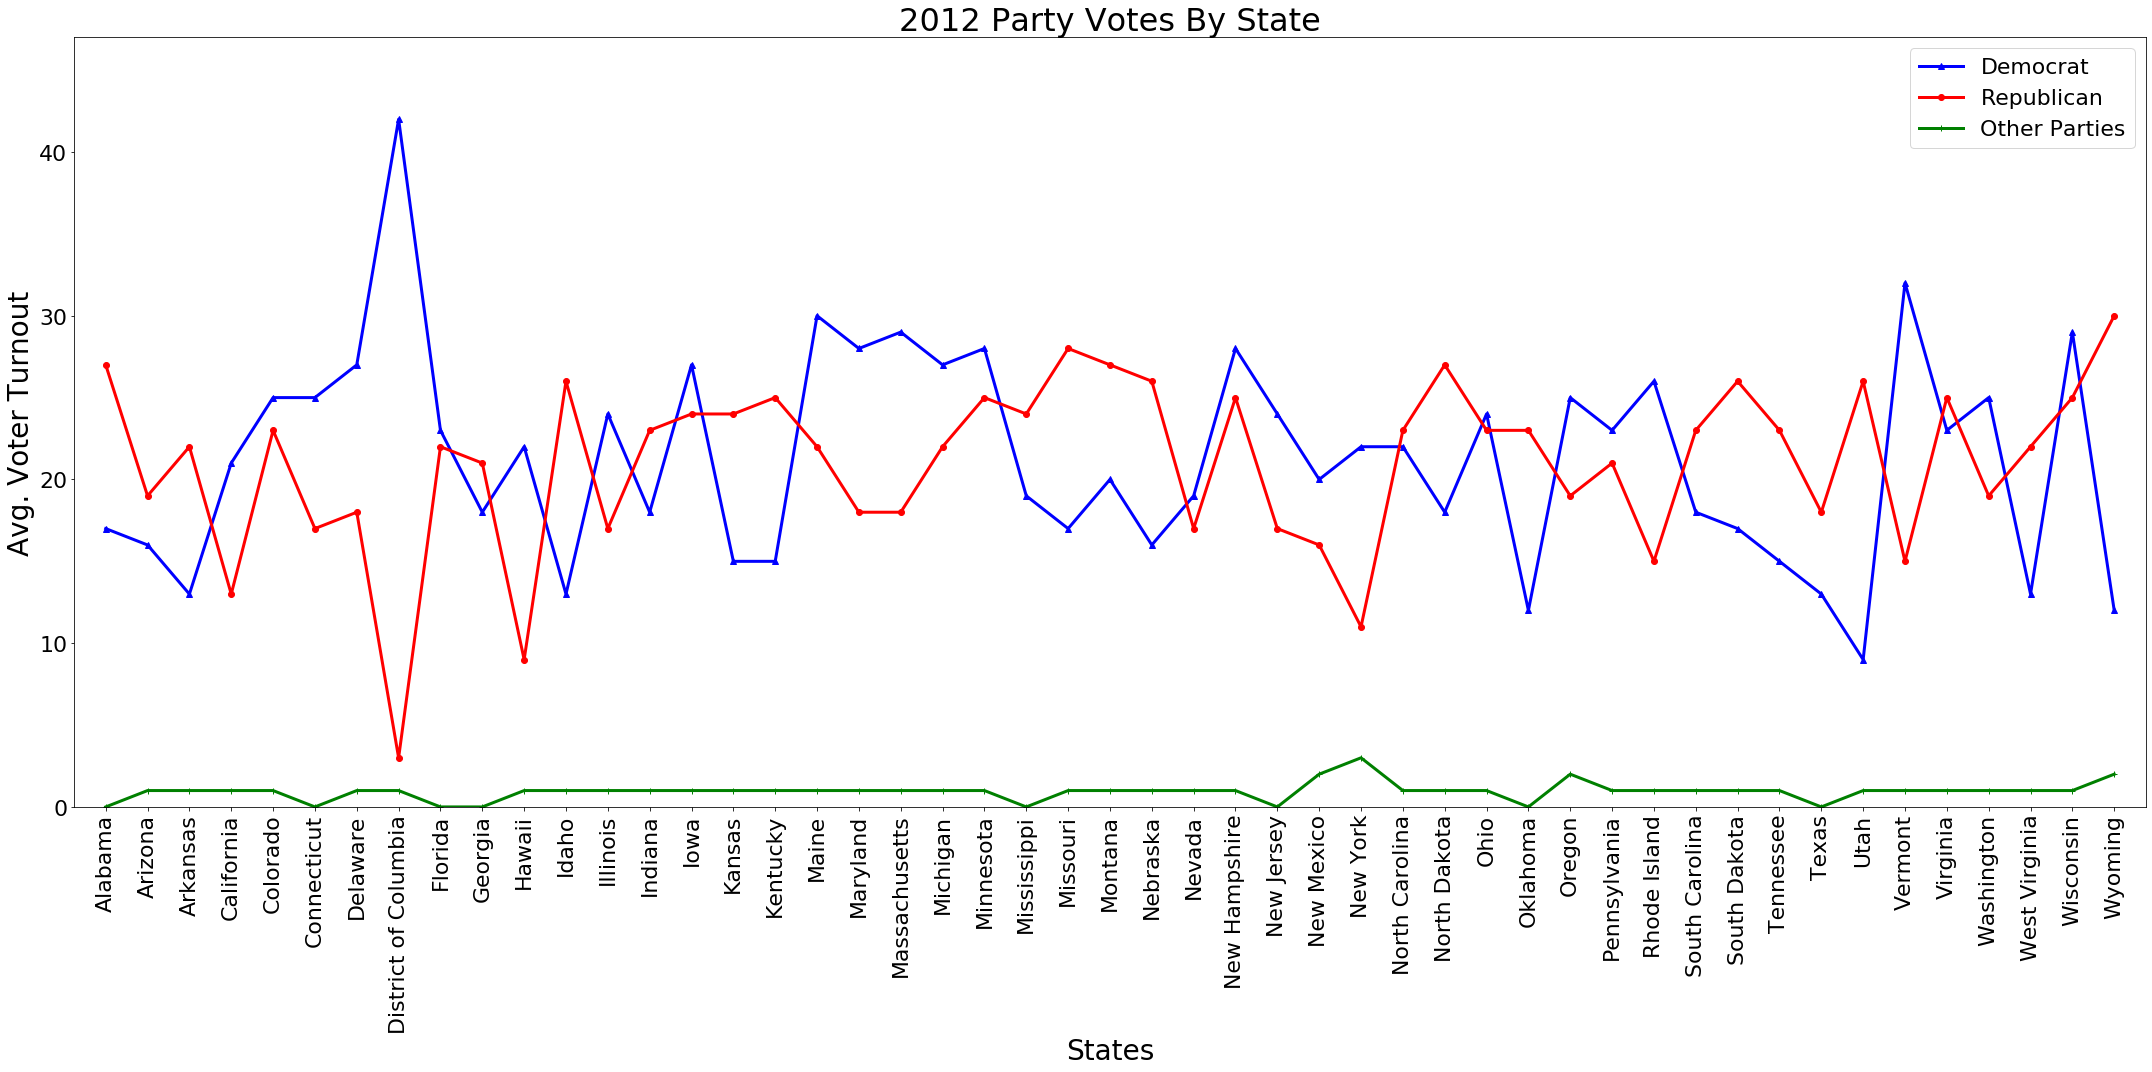

In [9]:
# Avg. Party votes by state...
#
plt.figure(figsize=(30,15))
plt.rc('axes', titlesize=32)
plt.rc('axes', labelsize=28)
plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=22)
plt.rc('legend', fontsize=22)
title = year+' Party Votes By State'
pfile = title.replace(" ",'_')+'.png'
pfile = f"Resources/Images/{pfile}"
maxy = v2012_state_summary['2012_democrat_votes'].max()
if maxy < v2012_state_summary['2012_republican_votes'].max():
    maxy = v2012_state_summary['2012_republican_votes'].max()
Democrat = plt.plot(v2012_state_summary.index, v2012_state_summary["2012_democrat_votes"], linewidth=3,marker="^",color="blue",label="Democrat")
Republican = plt.plot(v2012_state_summary.index, v2012_state_summary["2012_republican_votes"], linewidth=3,marker="o",color="red",label="Republican")
Others = plt.plot(v2012_state_summary.index, v2012_state_summary["2012_other_votes"], linewidth=3,marker="+",color="green",label="Other Parties")
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.xlabel('States')
plt.ylabel("Avg. Voter Turnout")
plt.title(title)
plt.xlim(-0.75, len(v2012_state_summary.index)-.25)
plt.ylim(0, maxy+5)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig(pfile)
plt.show()

In [10]:
# Generating Random 50 counties...
random_sample_county = pd.DataFrame(v2012_county_summary.Location.sample(n=50, random_state=1))
random_sample_county.head()
v2012_filtered_county_summary = pd.merge(v2012_county_summary,random_sample_county, on='Location')
# v2012_filtered_county_summary.head()

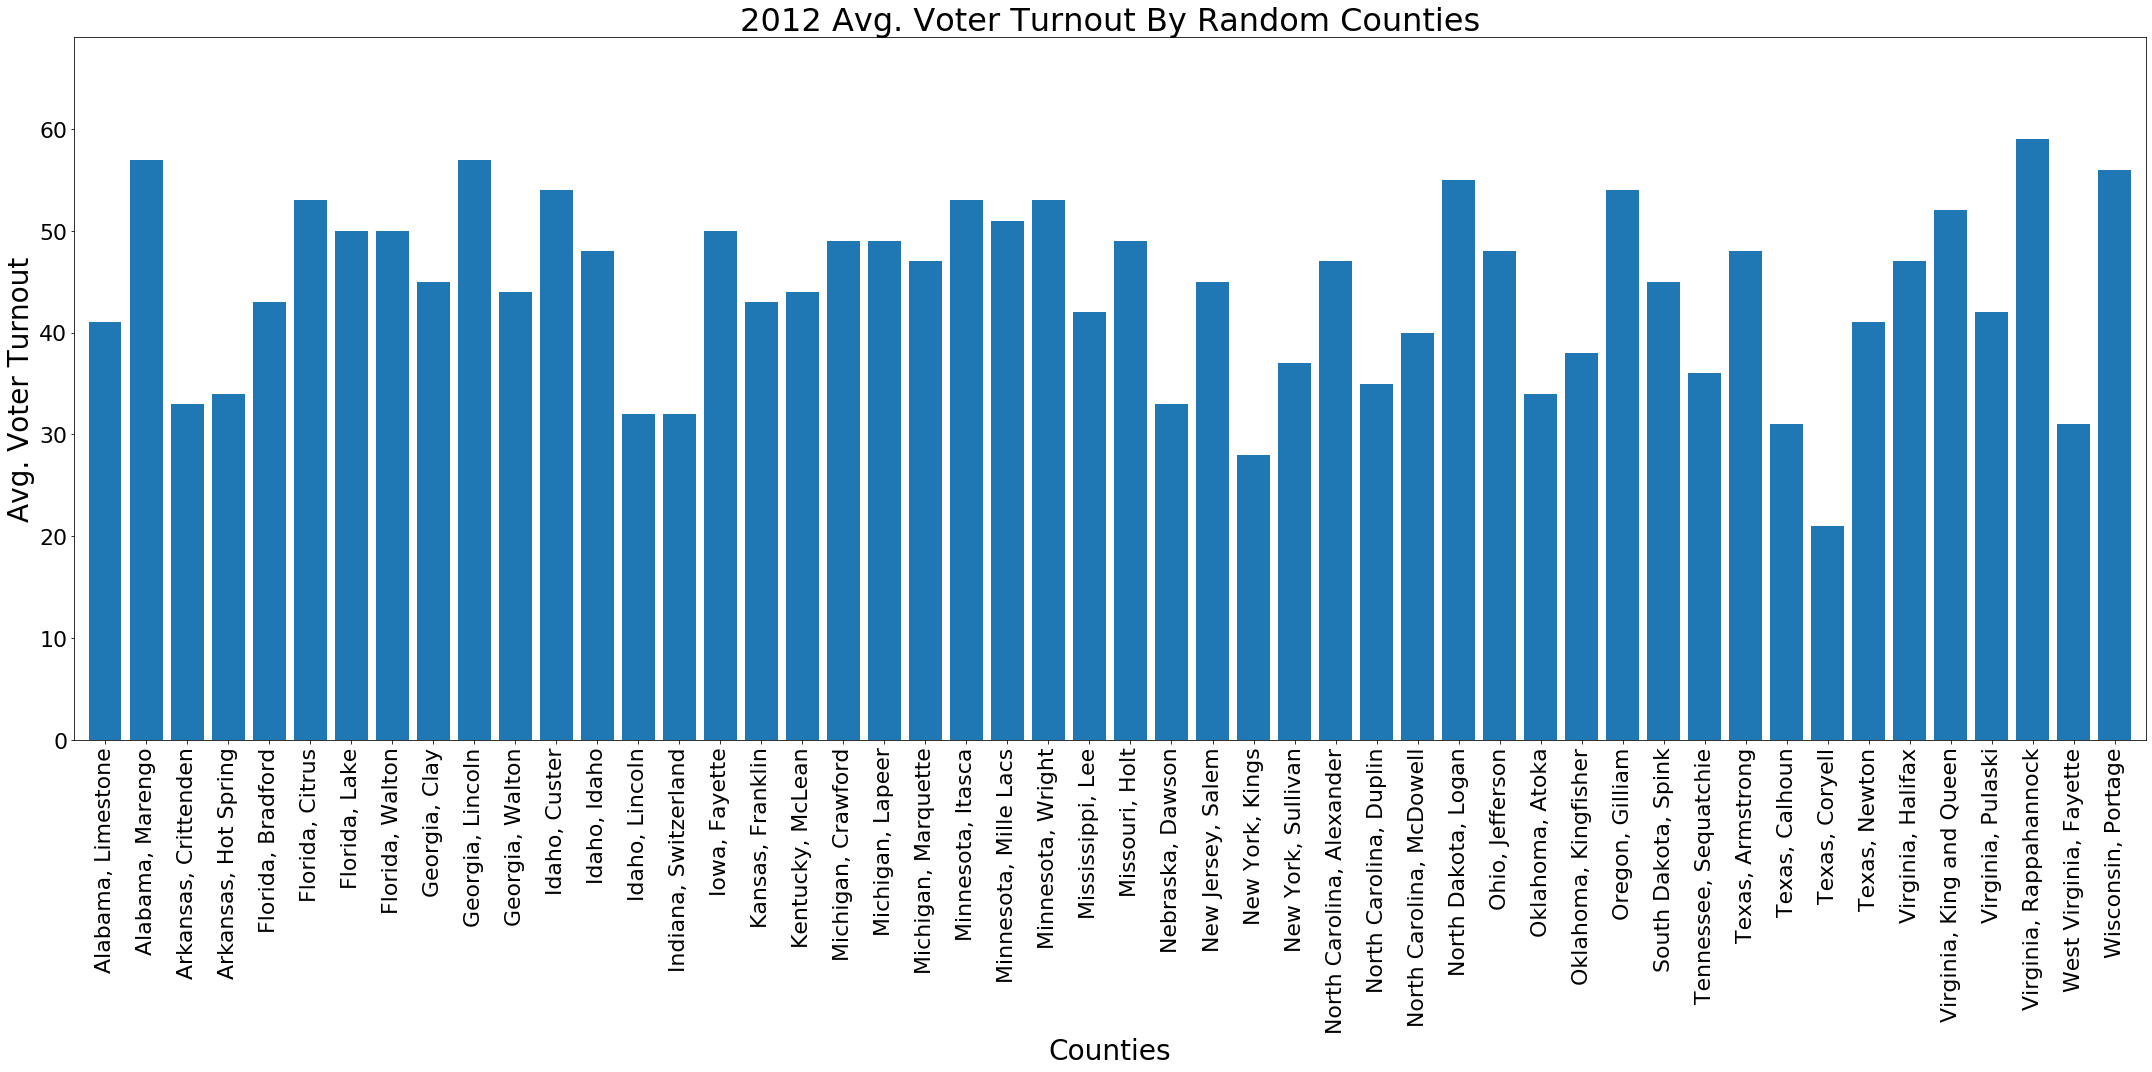

In [11]:
# Avg. Voter turnout by random counties...
#
title = year+' Avg. Voter Turnout By Random Counties'
pfile = title.replace(" ",'_')+'.png'
pfile = f"Resources/Images/{pfile}"
plt.figure(figsize=(30,15))
plt.rc('axes', titlesize=32)
plt.rc('axes', labelsize=28)
plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=22)
plt.bar(v2012_filtered_county_summary.Location, v2012_filtered_county_summary.avg_votes)
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.xlabel('Counties')
plt.ylabel("Avg. Voter Turnout")
plt.title(title)
plt.xlim(-0.75, len(v2012_filtered_county_summary.Location)-.25)
plt.ylim(0, v2012_filtered_county_summary.avg_votes.max()+10)
plt.tight_layout()
plt.savefig(pfile)
plt.show()

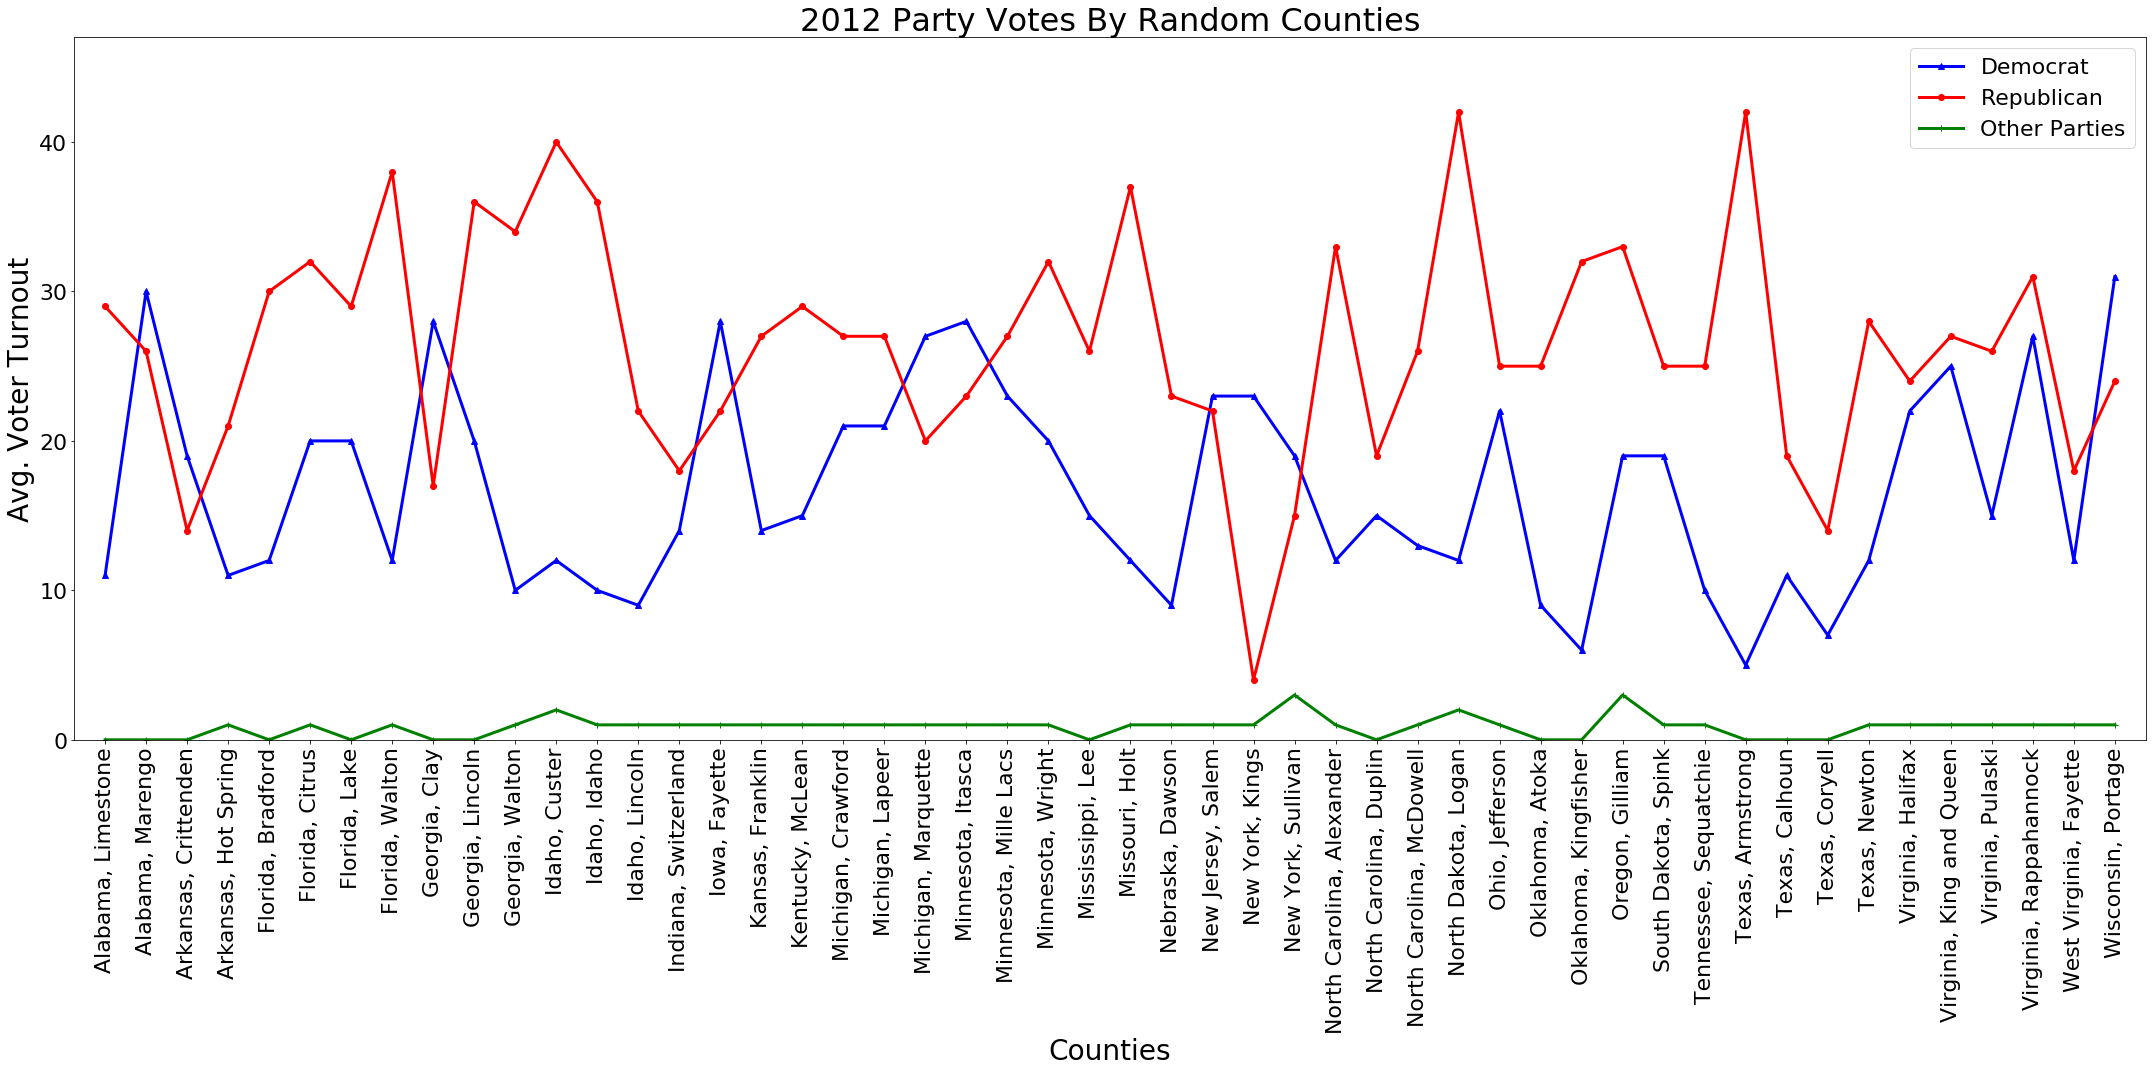

In [12]:
# Party votes by random counties...
#
plt.figure(figsize=(30,15))
title = year+' Party Votes By Random Counties'
pfile = title.replace(" ",'_')+'.png'
pfile = f"Resources/Images/{pfile}"
plt.rc('axes', titlesize=32)
plt.rc('axes', labelsize=28)
plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=22)
plt.rc('legend', fontsize=22)
maxy = v2012_state_summary['2012_democrat_votes'].max()
if maxy < v2012_state_summary['2012_republican_votes'].max():
    maxy = v2012_state_summary['2012_republican_votes'].max()
Democrat = plt.plot(v2012_filtered_county_summary.Location, v2012_filtered_county_summary["2012_democrat_votes"], linewidth=3,marker="^",color="blue",label="Democrat")
Republican = plt.plot(v2012_filtered_county_summary.Location, v2012_filtered_county_summary["2012_republican_votes"], linewidth=3,marker="o",color="red",label="Republican")
Others = plt.plot(v2012_filtered_county_summary.Location, v2012_filtered_county_summary["2012_other_votes"], linewidth=3,marker="+",color="green",label="Other Parties")
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.xlabel('Counties')
plt.ylabel("Avg. Voter Turnout")
plt.title(title)
plt.xlim(-0.75, len(v2012_filtered_county_summary.Location)-.25)
plt.ylim(0, maxy+5)
plt.legend(loc="best")
plt.tight_layout()
plt.savefig(pfile)
plt.show()

In [13]:
# Highest/Lowest voter turnout... 
#

print(year + " Highest Voter Turnout for the State  : " + ','.join(hv_st))
print(year + " Lowest Voter Turnout for the State   : " + ','.join(lv_st))
print("")
print(year + " Highest Voter Turnout for the County : " + ','.join(hv_cy))
print(year + " Lowest Voter Turnout for the County  : " + ','.join(lv_cy))


2012 Highest Voter Turnout for the State  : Wisconsin
2012 Lowest Voter Turnout for the State   : Hawaii,Texas

2012 Highest Voter Turnout for the County : Colorado, Mineral
2012 Lowest Voter Turnout for the County  : Georgia, Chattahoochee


In [14]:
population_votes = v2012_state_summary[['2012_democrat_votes','2012_republican_votes','2012_other_votes']]
population_votes.columns = ['2012_democrat_votes', '2012_republican_votes','2012_other_votes']
population_votes['pop_notvoted'] = (100-(population_votes['2012_democrat_votes']+population_votes['2012_republican_votes']+population_votes['2012_other_votes']))
population_votes.head()

,2012_democrat_votes,2012_republican_votes,2012_other_votes,pop_notvoted
State,,,,
Alabama,17.0,27.0,0.0,56.0
Arizona,16.0,19.0,1.0,64.0
Arkansas,13.0,22.0,1.0,64.0
California,21.0,13.0,1.0,65.0
Colorado,25.0,23.0,1.0,51.0


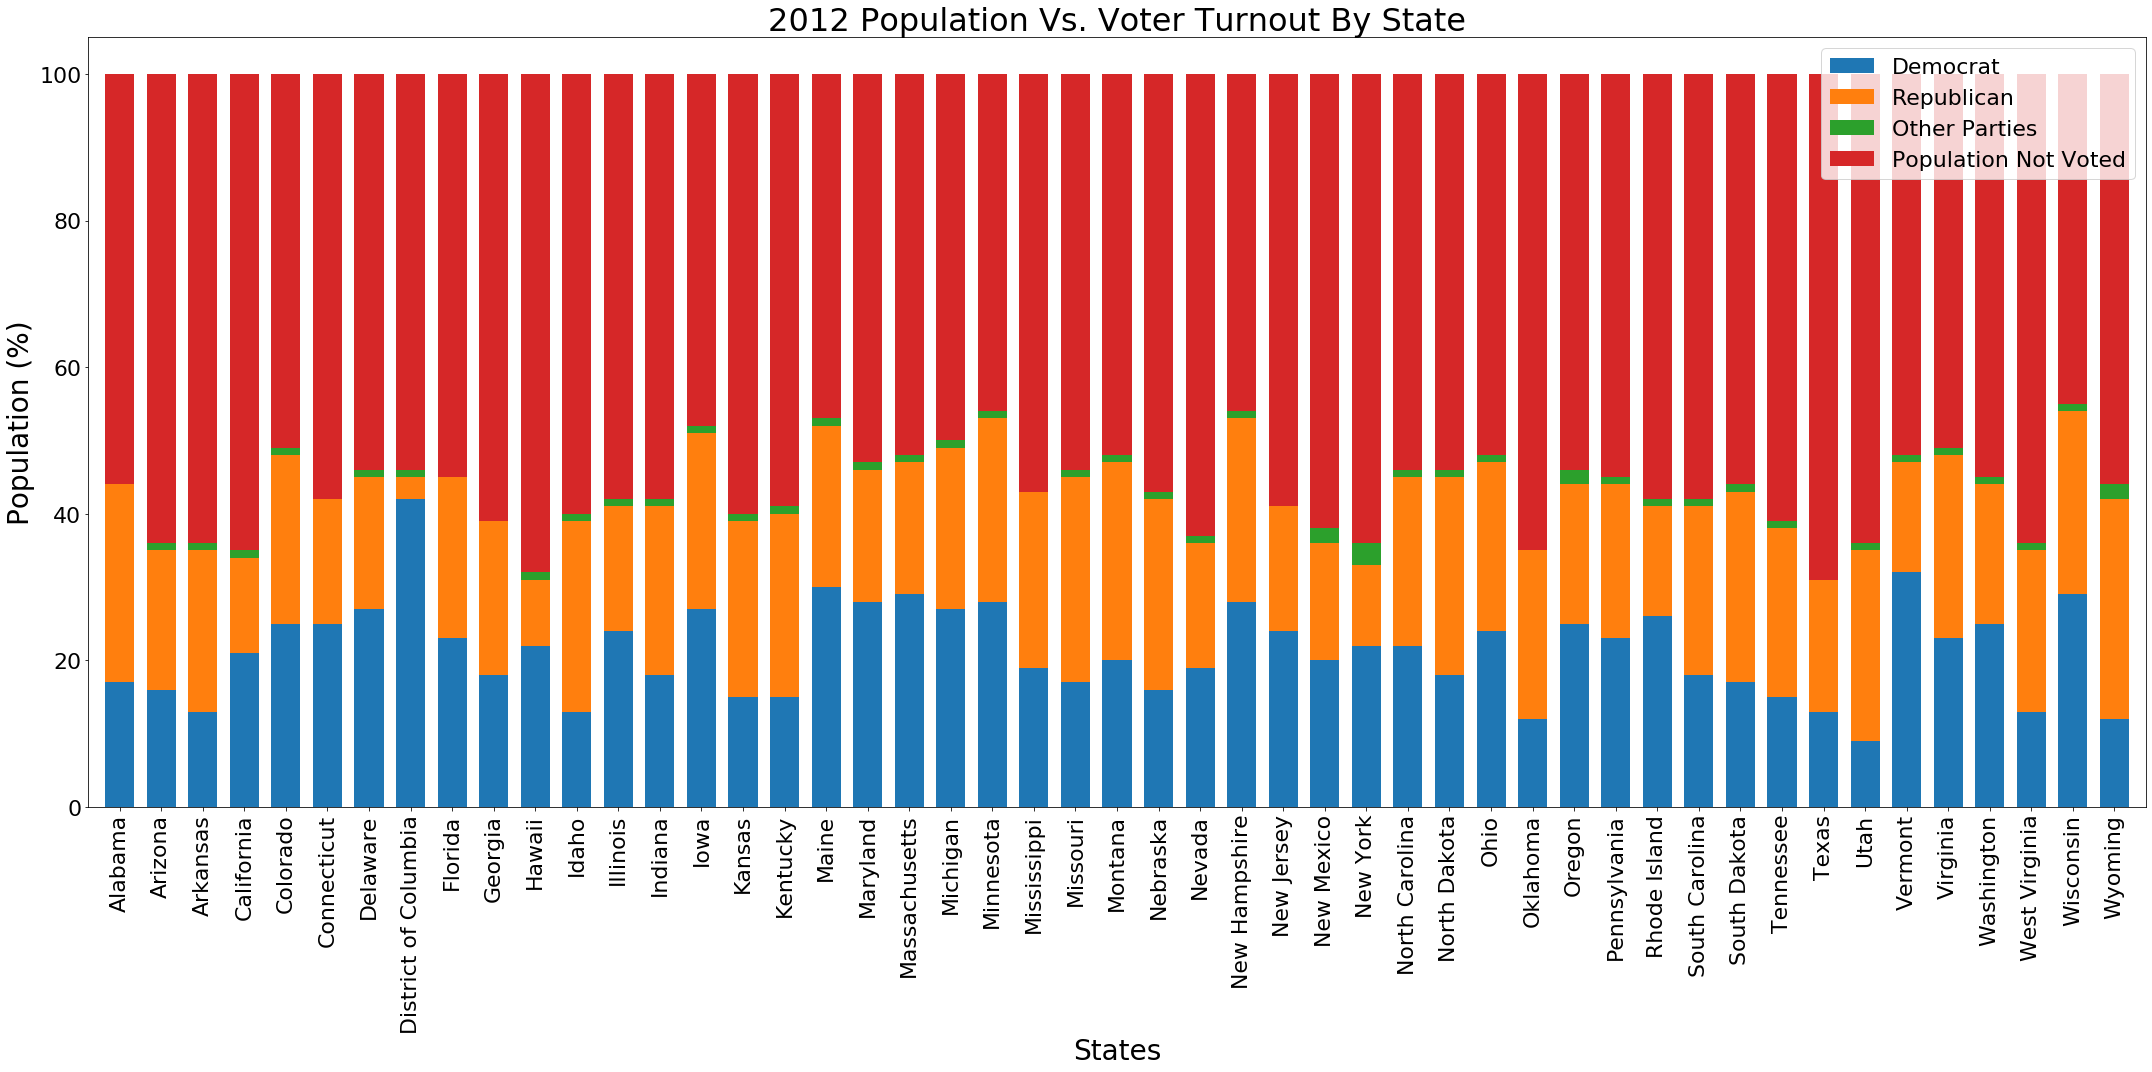

In [15]:
# Poplulation vs.Voter turnout by state for the year 2012...
#
title = year+' Population Vs. Voter Turnout By State'
pfile = title.replace(" ",'_')+'.png'
pfile = f"Resources/Images/{pfile}"
plt.figure(figsize=(30,15))
bottom = 0
label = ['Democrat','Republican','Other Parties','Population Not Voted']
plt.rc('axes', titlesize=32)
plt.rc('axes', labelsize=28)
plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=22)
#
for i in population_votes.columns:
    plt.bar(population_votes.index, population_votes[i],  width=0.7, bottom=bottom)
    bottom += population_votes[i]
#
plt.xticks(rotation=90)
plt.yticks(rotation=360)
plt.legend(label)
plt.xlabel('States')
plt.ylabel("Population (%)")
plt.title(title)
plt.xlim(-0.75, len(population_votes.index)-.25)
plt.tight_layout()
plt.savefig(pfile)
plt.show()

In [16]:
# Outliers
#
quartiles = v2012_county_summary['avg_votes'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of county outliers  is :{lowerq}")
print(f"The upper quartile of county outliers  is :{upperq}")
print(f"The interquartile range of county outliers  is :{iqr}")
print(f"The median of county volume  is :{quartiles[0.5]}")
print(f"Values below {round(lower_bound,6)} could be outliers. ")
print(f"Values above {round(upper_bound,6)} could be outliers. ")
print(" ")

The lower quartile of county outliers  is :38.0
The upper quartile of county outliers  is :49.0
The interquartile range of county outliers  is :11.0
The median of county volume  is :43.0
Values below 21.5 could be outliers. 
Values above 65.5 could be outliers. 
 


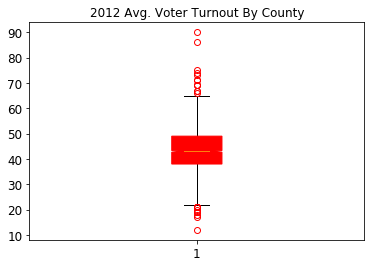

In [17]:
title = year+' Avg. Voter Turnout By County'
pfile = title.replace(" ",'_')+'.png'
pfile = f"Resources/Images/{pfile}"
boxplot_data = v2012_county_summary['avg_votes']
fig = plt.figure()
plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
c = "red"
plt.boxplot(boxplot_data,  notch=True, patch_artist=True, 
            boxprops=dict(facecolor=c, color=c), flierprops=dict(color=c, markeredgecolor=c))

plt.title(title)
plt.savefig(pfile)
plt.show()

In [18]:
pop_county = v2012_county_summary['avg_votes']
sample_county = pd.DataFrame(v2012_county_summary.avg_votes.sample(n=1000, random_state=1))

stats.ttest_1samp(sample_county, pop_county.mean())

Ttest_1sampResult(statistic=array([0.52359702]), pvalue=array([0.60067498]))